In [12]:
# Import Dependencies
import os
import pandas as pd
import requests
import json
import pprint
import matplotlib
import matplotlib.pyplot as plt
from config import (aqs_api_key)
from config import (email_address)


# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
daily_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
annual_data_url = "https://aqs.epa.gov/data/api/annualData/byState"
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
Hawaii = "15"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"

cali_data = []
hawaii_data = []
ny_data = []
dc_data = []
mass19_data = []
mass20_data = []
dc19_data = []
dc20_data = []

In [13]:
dc_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190501", "edate" : "20191201", "state" : District_of_Columbia}

# Call to url
dc_response = requests.get(annual_data_url, params = dc_params).json()
dc_data


[]

In [14]:
# Create a DataFrame for California and pull carbon monoxide data from API
dc_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : District_of_Columbia}

# Call to url
dc_response = requests.get(daily_data_url, params = dc_params).json()
dc_data.append(dc_response)

dc_df = pd.DataFrame(dc_data[0]["Data"])
dc_df.head()


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
1,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
2,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
3,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
4,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05


In [15]:
clean_dc_df=dc_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name","event_type","validity_indicator","method_code"], axis=1)


In [16]:
dc_df.isnull()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
726,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
dc_df.nsmallest(3, 'first_max_value')

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
281,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
337,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
332,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05


In [18]:
# Create a DataFrame for Hawaii and pull carbon monoxide data from API
hawaii_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : Hawaii}

# Call to url
hawaii_response = requests.get(daily_data_url, params = hawaii_params).json()
hawaii_data.append(hawaii_response)

hawaii_df = pd.DataFrame(hawaii_data[0]["Data"])
hawaii_df.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,15,003,0010,42101,1,21.323745,-158.088613,WGS84,Carbon monoxide,1 HOUR,...,093,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,Kapolei,2052 LAUWILIWILI ST,Hawaii,Honolulu,Not in a city,46520,"Urban Honolulu, HI",2020-06-10
1,15,003,0010,42101,1,21.323745,-158.088613,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,093,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,Kapolei,2052 LAUWILIWILI ST,Hawaii,Honolulu,Not in a city,46520,"Urban Honolulu, HI",2020-06-10
2,15,003,0010,42101,1,21.323745,-158.088613,WGS84,Carbon monoxide,1 HOUR,...,093,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,Kapolei,2052 LAUWILIWILI ST,Hawaii,Honolulu,Not in a city,46520,"Urban Honolulu, HI",2020-06-10
3,15,003,0010,42101,1,21.323745,-158.088613,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,093,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,Kapolei,2052 LAUWILIWILI ST,Hawaii,Honolulu,Not in a city,46520,"Urban Honolulu, HI",2020-06-10
4,15,003,0010,42101,1,21.323745,-158.088613,WGS84,Carbon monoxide,1 HOUR,...,093,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,Kapolei,2052 LAUWILIWILI ST,Hawaii,Honolulu,Not in a city,46520,"Urban Honolulu, HI",2020-06-10


In [19]:
# Create a DataFrame for District of Columbia and pull carbon monoxide data from API
cali_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : California}

# Call to url
cali_response = requests.get(daily_data_url, params = dc_params).json()
dc_data.append(dc_response)

cali_df = pd.DataFrame(dc_data[0]["Data"])
cali_df.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
1,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
2,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
3,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
4,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05


In [20]:
# Create a DataFrame for New York and pull carbon monoxide data from API
ny_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200801", "state" : New_York}

# Call to url
ny_response = requests.get(daily_data_url, params = ny_params).json()
ny_data.append(ny_response)

ny_df = pd.DataFrame(ny_data[0]["Data"])
ny_df.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,1 HOUR,...,554,INSTRUMENTAL - Gas Filter Correlation Thermo E...,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-08-03
1,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,554,INSTRUMENTAL - Gas Filter Correlation Thermo E...,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-08-03
2,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,1 HOUR,...,554,INSTRUMENTAL - Gas Filter Correlation Thermo E...,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-08-03
3,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,554,INSTRUMENTAL - Gas Filter Correlation Thermo E...,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-08-03
4,36,001,0012,42101,1,42.68075,-73.75733,WGS84,Carbon monoxide,1 HOUR,...,554,INSTRUMENTAL - Gas Filter Correlation Thermo E...,LOUDONVILLE,LOUDONVILLE RESERVOIR 300 ALBANY SHAKER RD,New York,Albany,Albany,10580,"Albany-Schenectady-Troy, NY",2020-08-03


In [21]:
# Create a DataFrame for Mass and pull carbon monoxide data from API
# Pull from 2019 and 2020 to merge, api does not allow pulls from multiple years together.
#2019
mass_params19 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190401", "edate" : "20191231", "state" : Massachusetts}

    # Call to url
mass19_response = requests.get(daily_data_url, params = mass_params19).json()
mass19_data.append(mass19_response)

mass19_df = pd.DataFrame(mass19_data[0]["Data"])

#2020
mass_params20 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200401", "state" : Massachusetts}

    # Call to url
mass20_response = requests.get(daily_data_url, params = mass_params20).json()
mass20_data.append(mass20_response)

mass20_df = pd.DataFrame(mass20_data[0]["Data"])

# Merge 2019 and 2020 data
merge_mass_df = mass19_df.append(mass20_df)
merge_mass_df


,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,25,025,0042,42101,1,42.329500,-71.082600,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,DUDLEY SQUARE ROXBURY,HARRISON AVE,Massachusetts,Suffolk,Boston,14460,"Boston-Cambridge-Newton, MA-NH",2020-03-02
1,25,025,0042,42101,1,42.329500,-71.082600,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,DUDLEY SQUARE ROXBURY,HARRISON AVE,Massachusetts,Suffolk,Boston,14460,"Boston-Cambridge-Newton, MA-NH",2020-03-02
2,25,025,0042,42101,1,42.329500,-71.082600,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,DUDLEY SQUARE ROXBURY,HARRISON AVE,Massachusetts,Suffolk,Boston,14460,"Boston-Cambridge-Newton, MA-NH",2020-03-02
3,25,025,0042,42101,1,42.329500,-71.082600,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,DUDLEY SQUARE ROXBURY,HARRISON AVE,Massachusetts,Suffolk,Boston,14460,"Boston-Cambridge-Newton, MA-NH",2020-03-02
4,25,025,0042,42101,1,42.329500,-71.082600,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,DUDLEY SQUARE ROXBURY,HARRISON AVE,Massachusetts,Suffolk,Boston,14460,"Boston-Cambridge-Newton, MA-NH",2020-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,25,013,0018,42101,1,42.120229,-72.584503,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,None,600 Liberty St,Massachusetts,Hampden,Springfield,44140,"Springfield, MA",2020-03-13
428,25,013,0018,42101,1,42.120229,-72.584503,NAD83,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,None,600 Liberty St,Massachusetts,Hampden,Springfield,44140,"Springfield, MA",2020-03-13
429,25,013,0018,42101,1,42.120229,-72.584503,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,None,600 Liberty St,Massachusetts,Hampden,Springfield,44140,"Springfield, MA",2020-03-13
430,25,013,0018,42101,1,42.120229,-72.584503,NAD83,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,None,600 Liberty St,Massachusetts,Hampden,Springfield,44140,"Springfield, MA",2020-03-13


In [22]:
# Create a DataFrame for DC and pull carbon monoxide data from API
# Pull from 2019 and 2020 to merge, api does not allow pulls from multiple years together.
#2019
dc_params19 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190401", "edate" : "20191231", "state" : District_of_Columbia}

    # Call to url
dc19_response = requests.get(daily_data_url, params = dc_params19).json()
dc19_data.append(dc19_response)

dc19_df = pd.DataFrame(dc19_data[0]["Data"])

#2020
dc_params20 = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200401", "state" : District_of_Columbia}

    # Call to url
dc20_response = requests.get(daily_data_url, params = dc_params20).json()
dc20_data.append(dc20_response)

dc20_df = pd.DataFrame(dc20_data[0]["Data"])

# Merge 2019 and 2020 data
merge_dc_df = dc19_df.append(dc20_df)
merge_dc_df

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-02-07
1,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-02-07
2,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-02-07
3,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-02-07
4,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-02-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,11,001,0051,42101,1,38.894770,-76.953426,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Near Road,3600 Benning Road N.E.,District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
364,11,001,0051,42101,1,38.894770,-76.953426,NAD83,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Near Road,3600 Benning Road N.E.,District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
365,11,001,0051,42101,1,38.894770,-76.953426,NAD83,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Near Road,3600 Benning Road N.E.,District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
366,11,001,0051,42101,1,38.894770,-76.953426,NAD83,Carbon monoxide,1 HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,Near Road,3600 Benning Road N.E.,District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05


In [99]:
# Drop unnecessary columns to clean DF
clean_dc_df = merge_dc_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name",
                            "event_type","validity_indicator","method_code","state_code","county_code",
                            "site_number","parameter","pollutant_standard","units_of_measure","method",
                            "site_address","cbsa","observation_count","observation_percent"], axis=1)

# Filter out the 1-hour sample_duration and fix any null values
sample_duration = clean_dc_df['sample_duration'] == '8-HR RUN AVG END HOUR'
clean_dc_df = clean_dc_df[sample_duration]

clean_dc_df

# Groupby date and fix null values
group_dc = pd.DataFrame(clean_dc_df.groupby(['date_local', 'county']).mean().unstack())
group_dc.fillna(0)
# group_mass.index

,latitude,longitude,arithmetic_mean,first_max_value,first_max_hour,aqi
county,District of Columbia,District of Columbia,District of Columbia,District of Columbia,District of Columbia,District of Columbia
date_local,,,,,,
2019-04-01,38.908309,-76.983302,0.220833,0.35,21.5,4.0
2019-04-02,38.908309,-76.983302,0.335417,0.45,3.5,5.0
2019-04-03,38.908309,-76.983302,0.335417,0.55,7.5,6.5
2019-04-04,38.908309,-76.983302,0.514584,0.85,7.0,10.0
2019-04-05,38.908309,-76.983302,0.333334,0.45,0.0,5.0
...,...,...,...,...,...,...
2020-03-28,38.908309,-76.983302,0.270834,0.40,0.5,4.5
2020-03-29,38.908309,-76.983302,0.247917,0.35,20.0,4.0


In [100]:
group_dc.index = pd.to_datetime(group_dc.index)

In [101]:
dc_monthly = group_dc.resample('M').mean()

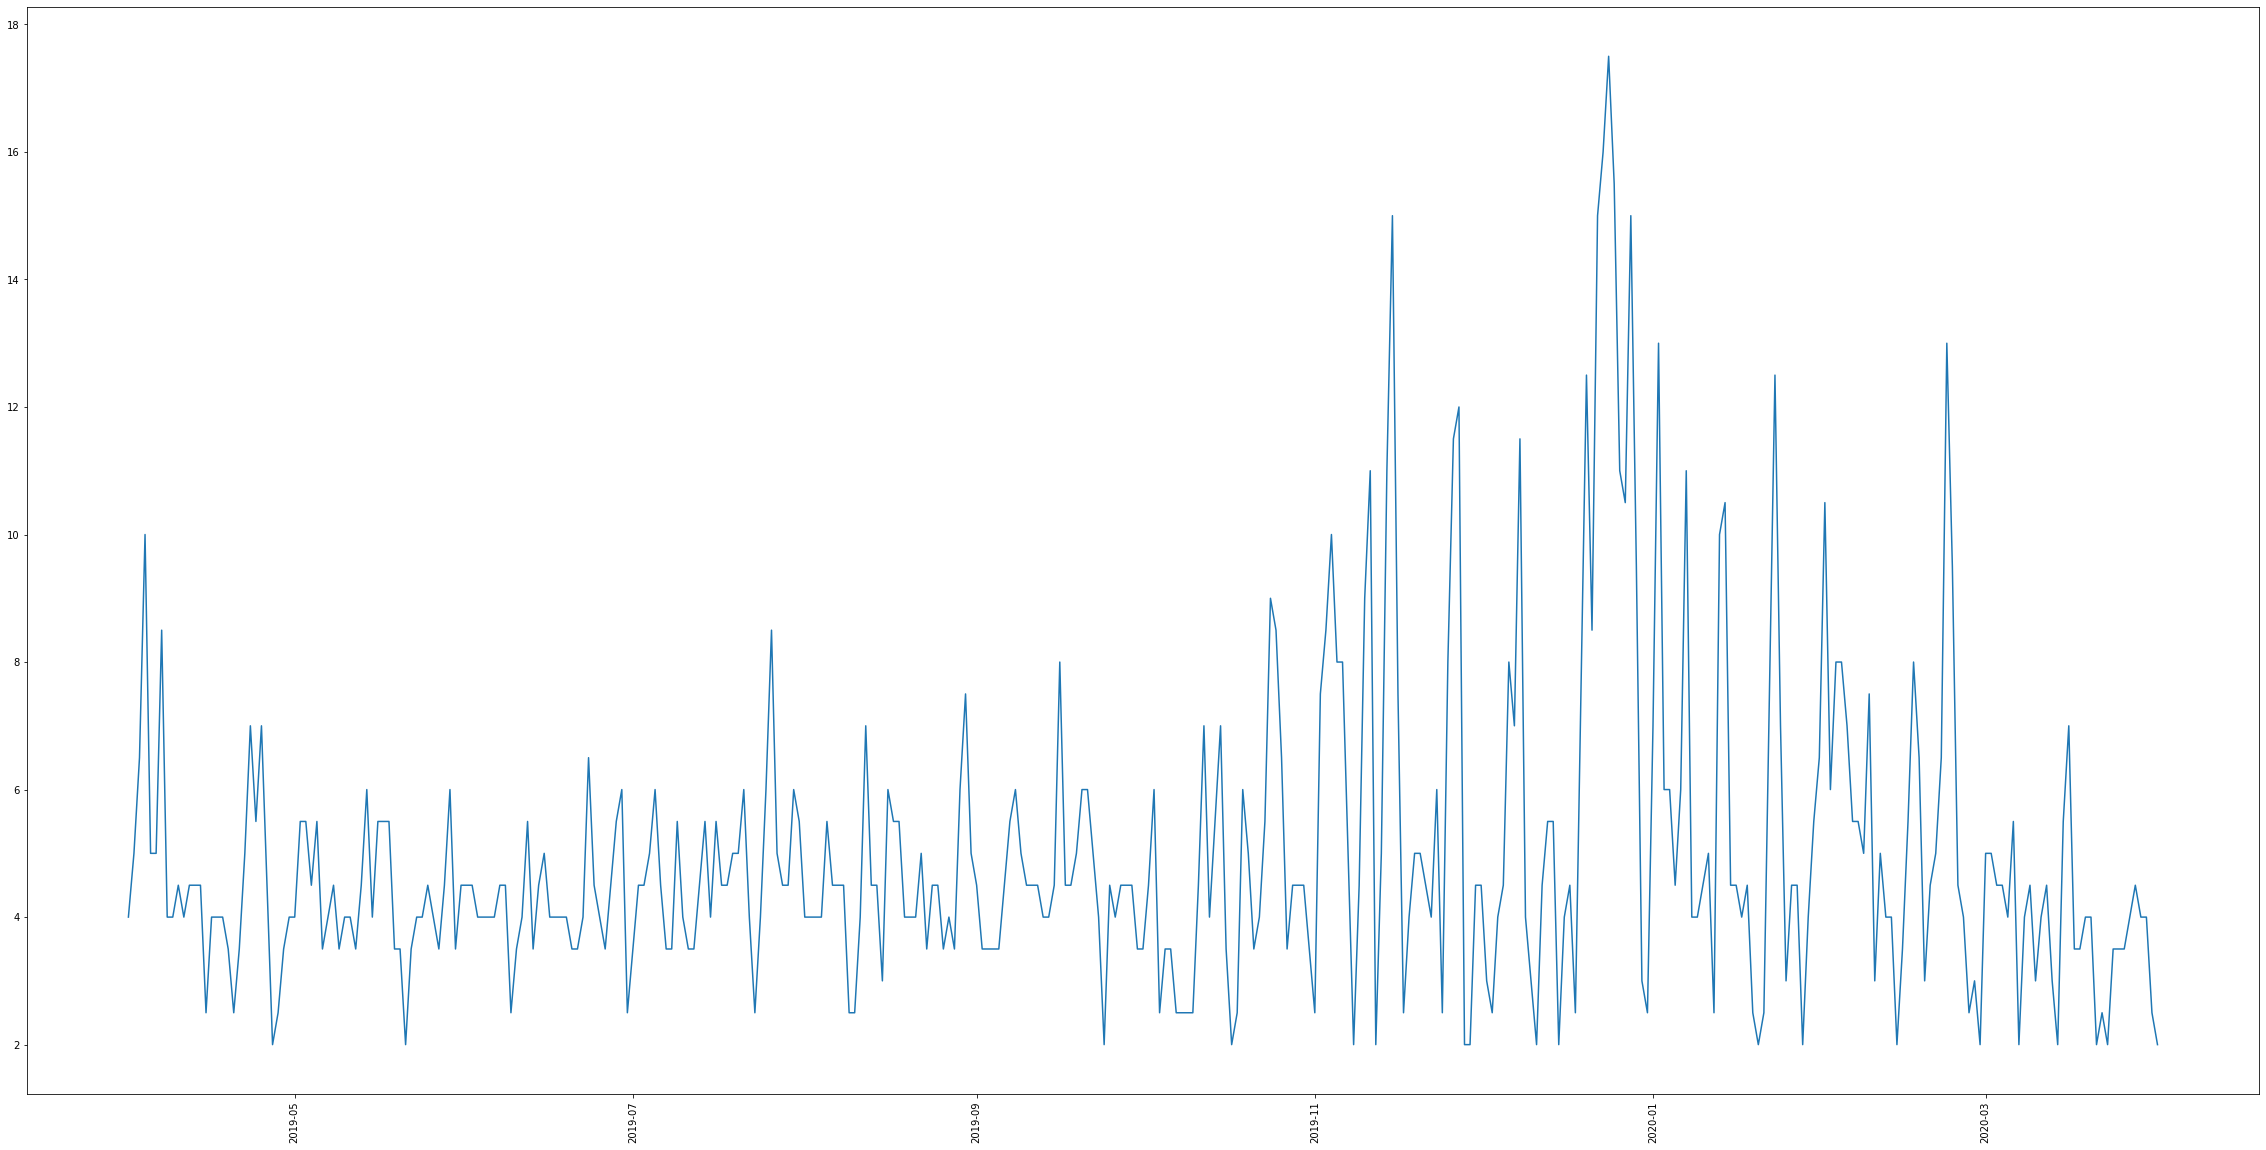

In [116]:
# Create first Line Chart for first_max_value of CO and data_local for DC_df
# dates = matplotlib.dates.date2num(clean_dc_df['date_local'])
fig, ax = plt.subplots(figsize=(40, 20))
plt.xticks(rotation = 90)
xvalue = group_dc.index
yvalue = group_dc['aqi']
plt.plot(xvalue, yvalue)


In [36]:
dc_df.date_local = pd.to_datetime(dc_df.date_local)

In [124]:
dc_df_daily_means = dc_df.groupby('date_local').mean()

In [125]:
dc_df_daily_means.head()

,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi
date_local,,,,,,,,,
2020-01-01,1.0,38.908308,-76.983302,21.25,88.5,0.266563,0.80350,22.75,7.0
2020-01-02,1.0,38.908308,-76.983302,24.00,100.0,0.694333,1.39250,7.25,13.0
2020-01-03,1.0,38.908308,-76.983302,23.75,99.0,0.319895,0.60825,20.75,6.0
2020-01-04,1.0,38.908308,-76.983302,23.75,99.0,0.306708,0.49300,1.25,6.0
2020-01-05,1.0,38.908308,-76.983302,24.00,100.0,0.217062,0.51125,22.00,4.5


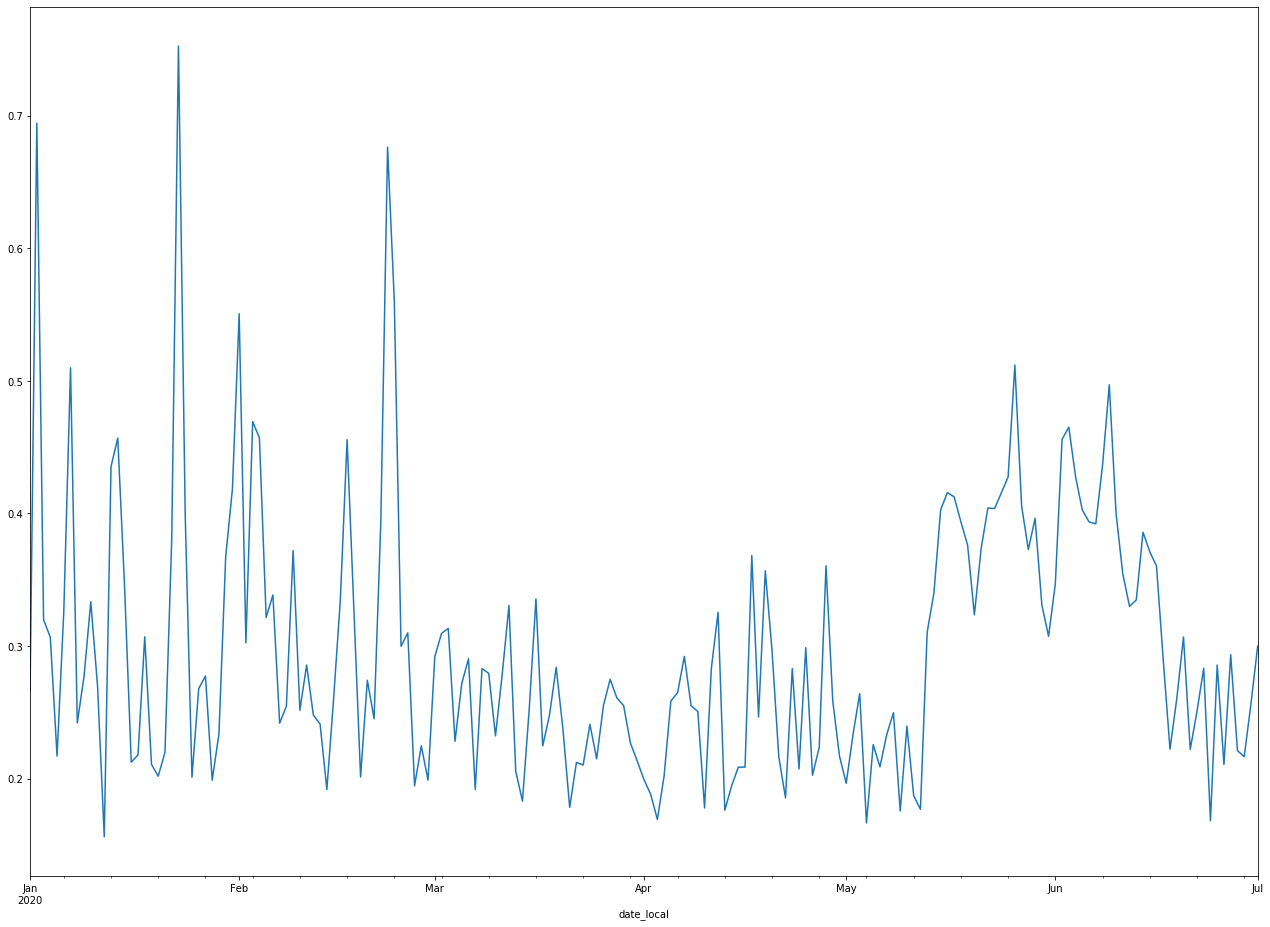

In [126]:
dc_df_daily_means.arithmetic_mean.plot(figsize=(22, 16));

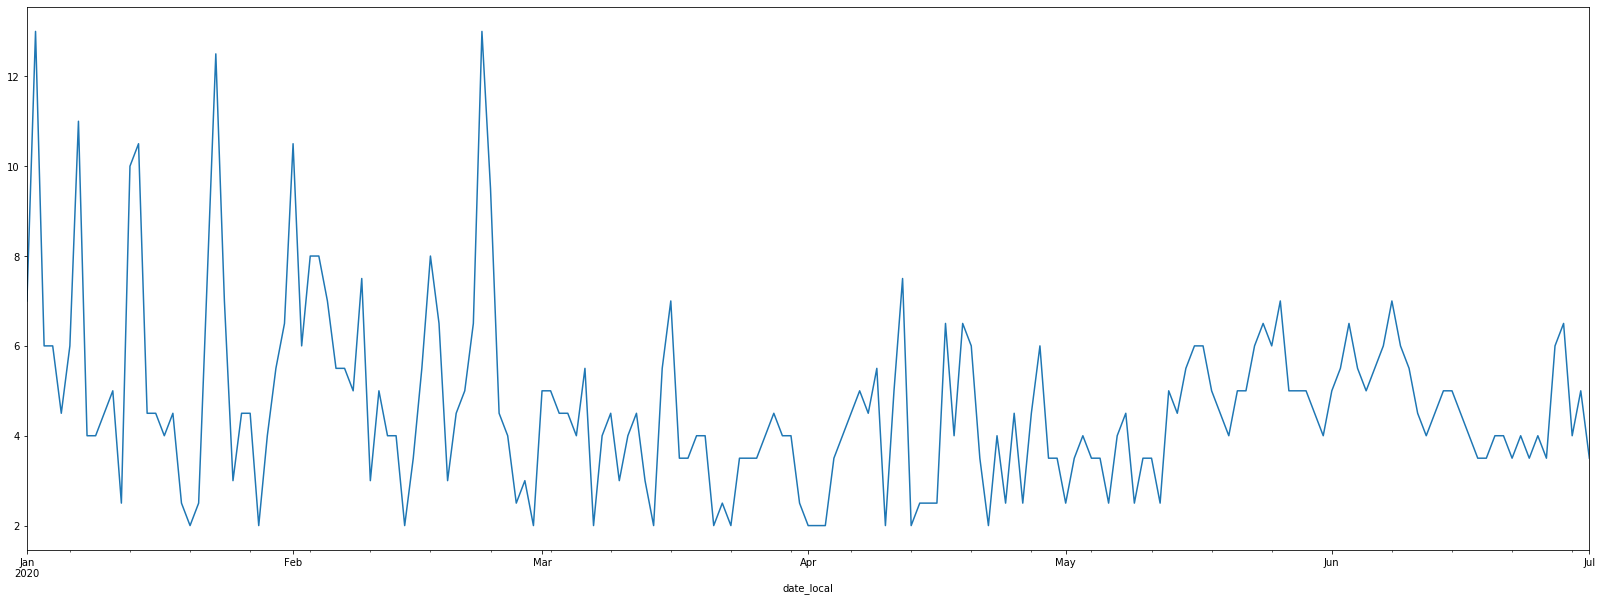

In [93]:
dc_df_daily_means.aqi.plot(figsize=(28,10));

In [43]:
#import statsmodels.api as sm

In [44]:
dc_df_daily_means = dc_df.groupby('date_local').mean()

In [45]:
dc_df_daily_means.head()

,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi
date_local,,,,,,,,,
2020-01-01,1.0,38.908308,-76.983302,21.25,88.5,0.266563,0.80350,22.75,7.0
2020-01-02,1.0,38.908308,-76.983302,24.00,100.0,0.694333,1.39250,7.25,13.0
2020-01-03,1.0,38.908308,-76.983302,23.75,99.0,0.319895,0.60825,20.75,6.0
2020-01-04,1.0,38.908308,-76.983302,23.75,99.0,0.306708,0.49300,1.25,6.0
2020-01-05,1.0,38.908308,-76.983302,24.00,100.0,0.217062,0.51125,22.00,4.5


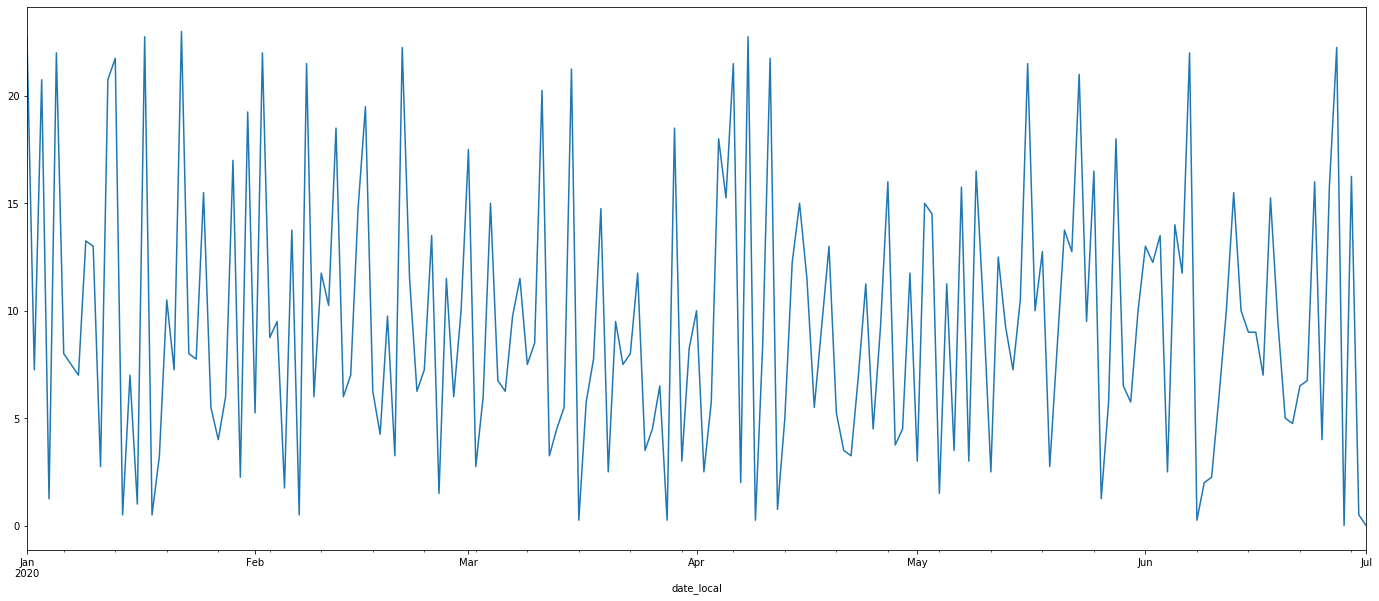

In [74]:
dc_df_daily_means.first_max_hour.plot(figsize=(24, 10));

In [82]:
dc_df['pollutant_standard'].unique()

array(['CO 1-hour 1971', 'CO 8-hour 1971'], dtype=object)

In [75]:
dc_df.columns

Index(['state_code', 'county_code', 'site_number', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter', 'sample_duration',
       'pollutant_standard', 'date_local', 'units_of_measure', 'event_type',
       'observation_count', 'observation_percent', 'validity_indicator',
       'arithmetic_mean', 'first_max_value', 'first_max_hour', 'aqi',
       'method_code', 'method', 'local_site_name', 'site_address', 'state',
       'county', 'city', 'cbsa_code', 'cbsa', 'date_of_last_change'],
      dtype='object')

In [77]:
dc_df.info

<bound method DataFrame.info of     state_code county_code site_number parameter_code  poc   latitude  \
0           11         001        0043          42101    1  38.921847   
1           11         001        0043          42101    1  38.921847   
2           11         001        0043          42101    1  38.921847   
3           11         001        0043          42101    1  38.921847   
4           11         001        0043          42101    1  38.921847   
..         ...         ...         ...            ...  ...        ...   
725         11         001        0051          42101    1  38.894770   
726         11         001        0051          42101    1  38.894770   
727         11         001        0051          42101    1  38.894770   
728         11         001        0051          42101    1  38.894770   
729         11         001        0051          42101    1  38.894770   

     longitude  datum        parameter        sample_duration  ...  \
0   -77.013178  WGS84

In [79]:
dc_df.shape

(730, 31)

In [89]:
dc_df.max

<bound method DataFrame.max of     state_code county_code site_number parameter_code  poc   latitude  \
0           11         001        0043          42101    1  38.921847   
1           11         001        0043          42101    1  38.921847   
2           11         001        0043          42101    1  38.921847   
3           11         001        0043          42101    1  38.921847   
4           11         001        0043          42101    1  38.921847   
..         ...         ...         ...            ...  ...        ...   
725         11         001        0051          42101    1  38.894770   
726         11         001        0051          42101    1  38.894770   
727         11         001        0051          42101    1  38.894770   
728         11         001        0051          42101    1  38.894770   
729         11         001        0051          42101    1  38.894770   

     longitude  datum        parameter        sample_duration  ...  \
0   -77.013178  WGS84 

In [128]:
dc_df = dc_df.loc[dc_df.sample_duration == '8-HR RUN AVG END HOUR']

In [129]:
dc_df = dc_df.loc[dc_df.validity_indicator == 'Y']

In [131]:
dc_df.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
1,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
3,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
5,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
7,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05
9,11,001,0043,42101,1,38.921847,-77.013178,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,593,INSTRUMENTAL - Gas Filter Correlation Teledyne...,MCMILLAN NCore-PAMS,"2500 1ST STREET, N.W. WASHINGTON DC",District Of Columbia,District of Columbia,Washington,47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2020-08-05


In [132]:
dc_df.date_local = pd.to_datetime(dc_df.date_local)

In [133]:
dc_df_daily_means = dc_df.groupby('date_local').mean()

In [134]:
dc_df_daily_means.head()

,poc,latitude,longitude,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi
date_local,,,,,,,,,
2020-01-01,1.0,38.908309,-76.983302,19.0,79.0,0.239474,0.60,23.0,7.0
2020-01-02,1.0,38.908309,-76.983302,24.0,100.0,0.735416,1.15,7.0,13.0
2020-01-03,1.0,38.908309,-76.983302,24.0,100.0,0.302083,0.50,21.5,6.0
2020-01-04,1.0,38.908309,-76.983302,24.0,100.0,0.329167,0.50,0.0,6.0
2020-01-05,1.0,38.908309,-76.983302,24.0,100.0,0.195833,0.40,22.5,4.5


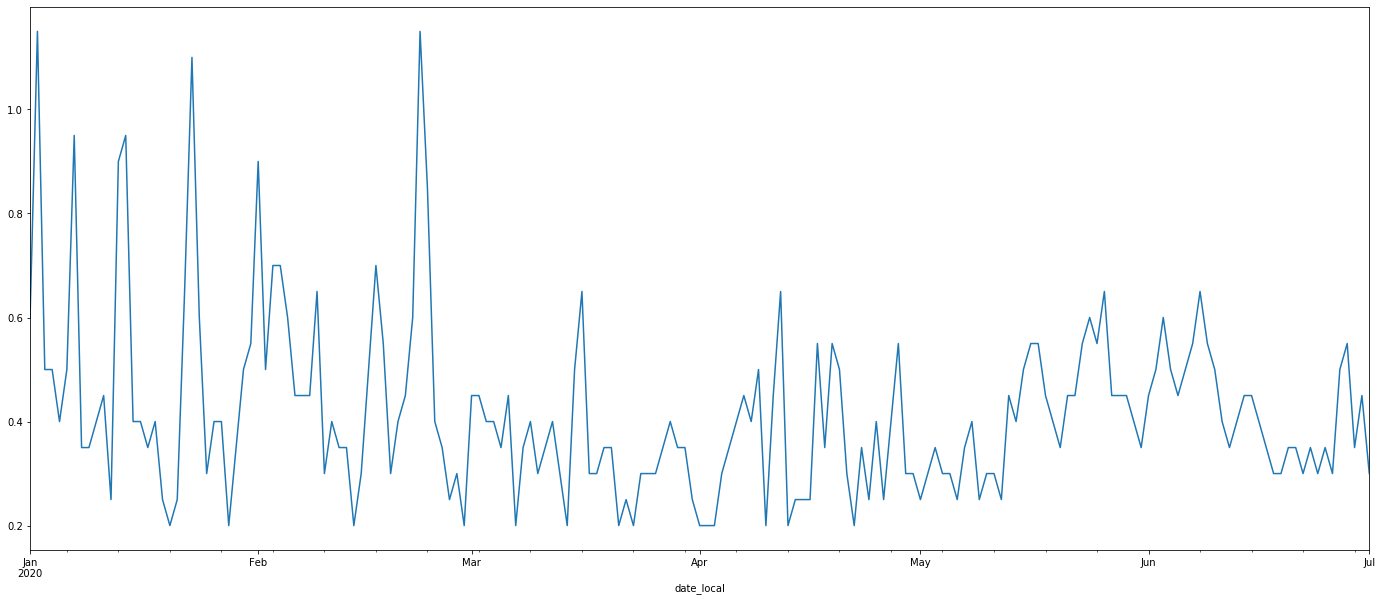

In [152]:
dc_df_daily_means.first_max_value.plot(figsize=(24, 10));